In [152]:
# Name: Chinmay Jain
# Batch ID Number: Lb11032021
# Email ID: chinmaybb.11@gmail.com

Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
previntive measures to stop or control the attrition.

## Importing modules and reading the file

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report

In [118]:
# Loading the data
HR_cap = pd.read_csv("HR_Employee_Attrition_Data.csv")
HR_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [119]:
# Null Value Check
HR_cap.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### From above we can see that there are no null values present 

In [98]:
# Checking the data-types
HR_cap.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [120]:
#Columns of dataset
HR_cap.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
# Dataframe with only numeric variables
HR_cap_num = HR_cap[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].copy()
# For Classification Report
vx = ['Yes', 'No']

<AxesSubplot:>

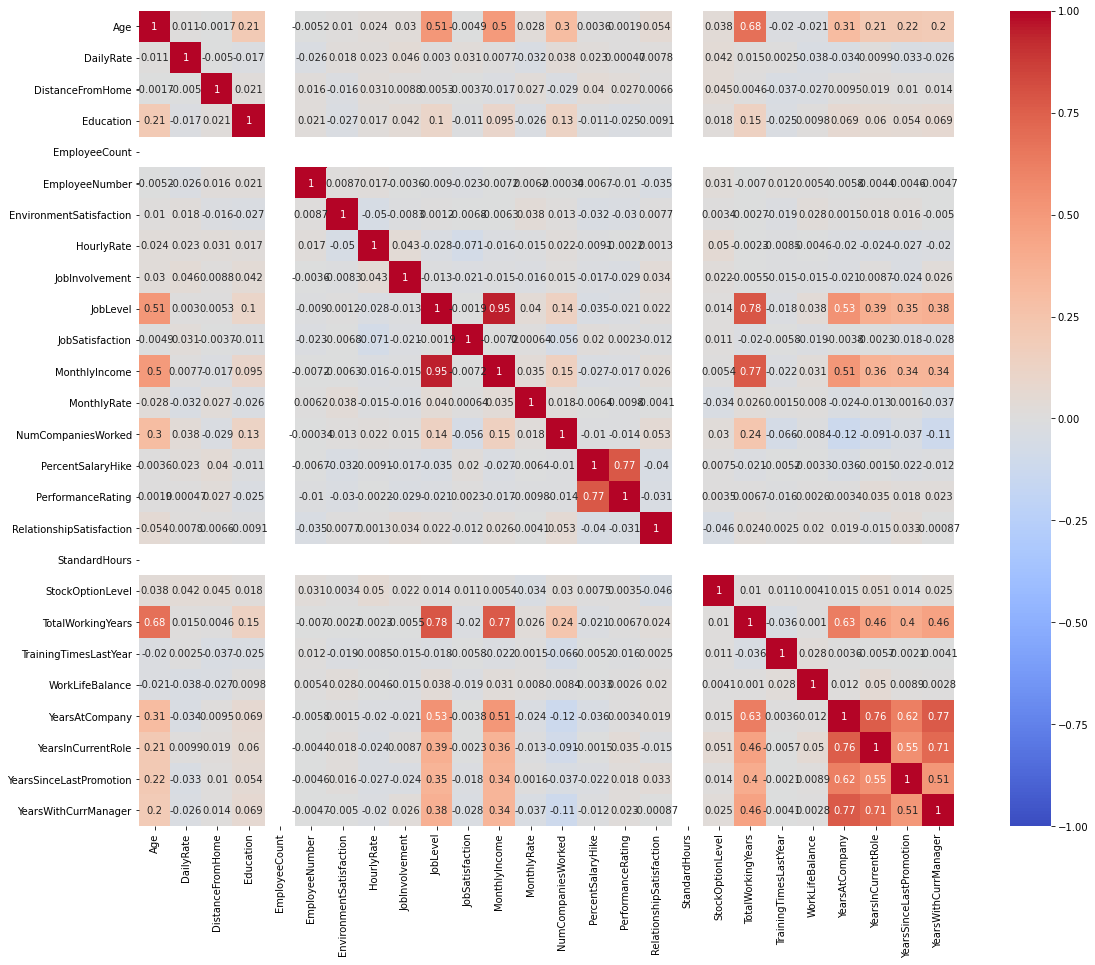

In [101]:
# Creating the correlation matrix to find to correlated variables
plt.subplots(figsize=(20,15))
sns.heatmap(HR_cap_num.corr(), square=True, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### We can see that there are highly correlated values from above figure so we have to remove those variables

In [122]:
#Copy categorical data
HR_cap_cat = HR_cap[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
HR_cap_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [123]:
Num_val = {'Yes':1, 'No':0}
HR_cap_cat['Attrition'] = HR_cap_cat["Attrition"].apply(lambda x: Num_val[x])
HR_cap_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [125]:
HR_cap_cat = pd.get_dummies(HR_cap_cat)
HR_cap_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [127]:
hr_data_final = pd.concat([HR_cap_num, HR_cap_cat], axis=1)
hr_data_final.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,1,0,0,0,1,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,0,1,0,0,0,1,0,1,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,0,0,0,0,0,1,0,1,1,0


# Model Building

In [128]:
# Checking for unwanted columns
print("Unique vales in EmployeeCount :", HR_cap['EmployeeCount'].unique())
print("Unique vales in Over 18 :", HR_cap['Over18'].unique())
print("Unique vales in StandardHours :", HR_cap['StandardHours'].unique())

Unique vales in EmployeeCount : [1]
Unique vales in Over 18 : ['Y']
Unique vales in StandardHours : [80]


In [129]:
HR_cap.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace = True)

In [130]:
HR_cap.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [131]:
HR_cap.shape

(2940, 31)

### Converting labels to nominal data

In [132]:
def labelencoder(df):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df['Attrition'] = le.fit_transform(temp_df['Attrition'])
    temp_df['BusinessTravel'] = le.fit_transform(temp_df['BusinessTravel'])
    temp_df['Department'] = le.fit_transform(temp_df['Department'])
    temp_df['EducationField'] = le.fit_transform(temp_df['EducationField'])
    temp_df['Gender'] = le.fit_transform(temp_df['Gender'])
    temp_df['JobRole'] = le.fit_transform(temp_df['JobRole'])
    temp_df['MaritalStatus'] = le.fit_transform(temp_df['MaritalStatus'])
    temp_df['OverTime'] = le.fit_transform(temp_df['OverTime'])
    return temp_df

encoded_cap_data = labelencoder(HR_cap)

In [133]:
HR_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [134]:
y = encoded_cap_data['Attrition']
X = encoded_cap_data.drop('Attrition', axis = 1)

In [135]:
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [136]:
X_train.shape

(2352, 30)

In [138]:
#Create the model and train
HR_model = RandomForestClassifier(n_estimators=50, random_state =0, bootstrap=True,criterion='gini',max_depth=18)
HR_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, n_estimators=50, random_state=0)

In [139]:
HR_model_score_train = HR_model.score(X_train, y_train)
print("Train score :", HR_model_score_train)
HR_model_score_test = HR_model.score(X_test, y_test)
print("Test score :", HR_model_score_test)

Train score : 1.0
Test score : 0.9693877551020408


<AxesSubplot:>

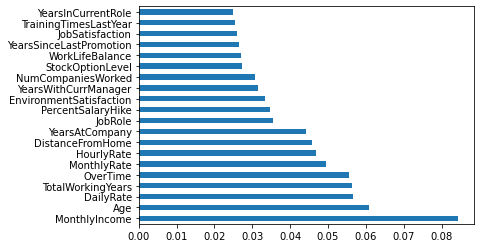

In [140]:
feat_importances = pd.Series(HR_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

#### We can now see the important varibales in the dataset and the most important variable is MonthlyIncome

## Predictions

In [141]:
predictions_rf = HR_model.predict(X_test)

## Confusion Matrix

In [142]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

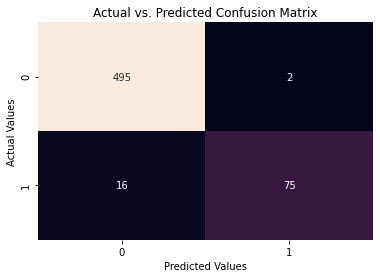

In [143]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### We can see from the above figure that 0 has been predicted as 0 483 times and 82 times 1 has been predicted as 1

In [144]:
# Accurracy
accuracy_rf = HR_model.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.969


In [145]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0306


## AUC

In [146]:
# We grab the second array from the output which corresponds to the predicted probabilites of positive classes Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = HR_model.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [147]:
auc_rf = auc(fpr2, tpr2)

In [148]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

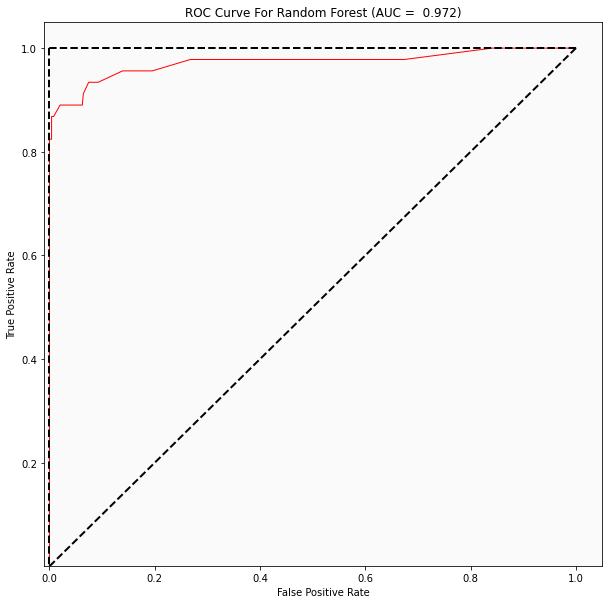

In [149]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### From the above figure we can see that True Positive Rate in front of AUC which means our model is able to predict 1 as 1 

## Classification Report

In [150]:
def print_class_report(predictions, alg_name):
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = vx))

In [151]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

         Yes       1.00      0.97      0.98       511
          No       0.82      0.97      0.89        77

    accuracy                           0.97       588
   macro avg       0.91      0.97      0.94       588
weighted avg       0.97      0.97      0.97       588



### Throughout this modelling, we can see that Data is important for most of the places in Human Resource department. We can see that avoiding correlated variables helps building the model better. I have used Random forest and can predict that it is helpful for the Human resource department to have a machine learning algorith. Also, I was able to find out the most important variables to employees and if they are not fulfilled it might lead to Attrition.